<a href="https://colab.research.google.com/github/tomraiz93/tam_project/blob/main/Basic_CNN_Deeplearning_project_Object_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chuẩn bị dữ liệu
- Sử dụng torchvision.datasets.CIFAR10 để tải và chuẩn bị dữ liệu CIFAR-10

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Chuẩn bị dữ liệu
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize ảnh về kích thước 32x32
    transforms.ToTensor(),  # Chuyển ảnh sang tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Chuẩn hóa dữ liệu về [-1, 1]
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:11<00:00, 14577348.87it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


#CNN Model
- Kế thừa từ nn.Module.
- Bao gồm các lớp convolution, ReLU, max pooling và fully connected layers.

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

#Khởi tạo mô hình tối ưu

In [3]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Huấn luyện mô hình

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_loss_values = []
test_loss_values = []
test_accuracy_values = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss /= len(train_dataloader)
    train_accuracy = correct / total
    train_loss_values.append(train_loss)

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss /= len(test_dataloader)
    test_accuracy = correct / total
    test_loss_values.append(test_loss)
    test_accuracy_values.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch [1/10], Train Loss: 0.3262, Train Accuracy: 0.8865, Test Loss: 1.1238, Test Accuracy: 0.6938
Epoch [2/10], Train Loss: 0.2730, Train Accuracy: 0.9053, Test Loss: 1.2319, Test Accuracy: 0.6801
Epoch [3/10], Train Loss: 0.2279, Train Accuracy: 0.9217, Test Loss: 1.3391, Test Accuracy: 0.6852
Epoch [4/10], Train Loss: 0.1856, Train Accuracy: 0.9370, Test Loss: 1.4625, Test Accuracy: 0.6875
Epoch [5/10], Train Loss: 0.1610, Train Accuracy: 0.9452, Test Loss: 1.5934, Test Accuracy: 0.6766
Epoch [6/10], Train Loss: 0.1350, Train Accuracy: 0.9534, Test Loss: 1.6705, Test Accuracy: 0.6804
Epoch [7/10], Train Loss: 0.1226, Train Accuracy: 0.9578, Test Loss: 1.8281, Test Accuracy: 0.6741
Epoch [8/10], Train Loss: 0.1045, Train Accuracy: 0.9639, Test Loss: 1.9622, Test Accuracy: 0.6767
Epoch [9/10], Train Loss: 0.0881, Train Accuracy: 0.9700, Test Loss: 2.0184, Test Accuracy: 0.6767
Epoch [10/10], Train Loss: 0.0883, Train Accuracy: 0.9696, Test Loss: 2.1424, Test Accuracy: 0.6742


#Kiểm tra mô hình

In [19]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6742


#Trực quan một số độ đo thông số của mô hình

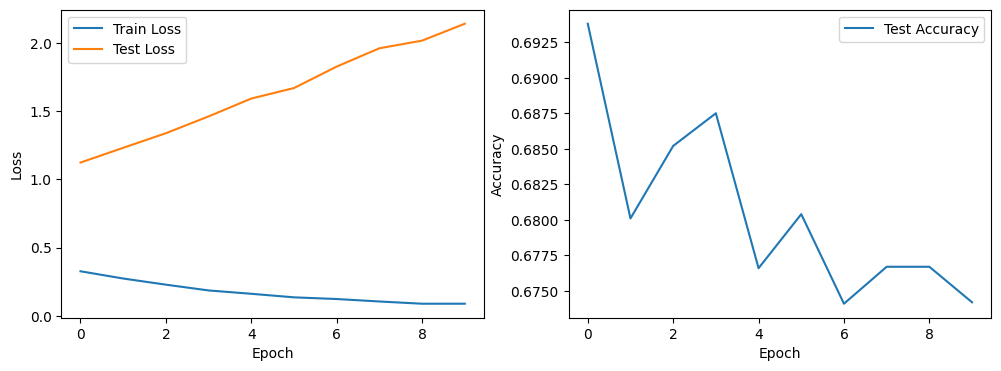

In [18]:
import matplotlib.pyplot as plt

def plot_metrics(train_loss_values, test_loss_values, test_accuracy_values):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_values, label='Train Loss')
    plt.plot(test_loss_values, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(test_accuracy_values, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
# Gọi hàm plot_metrics với các biến đã tính toán được
plot_metrics(train_loss_values, test_loss_values, test_accuracy_values)

#Test ảnh ngẫu nhiên

In [27]:
from PIL import Image
import torchvision.transforms as transforms

# Đọc ảnh
image = Image.open("city.jpg")

# Tiền xử lý ảnh
preprocess = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Thêm chiều batch

# Di chuyển dữ liệu lên GPU (nếu sử dụng GPU)
input_batch = input_batch.to(device)

In [28]:
# Đường dẫn đến file label.txt
label_file_path = "/content/Labels.txt"

# Đọc nội dung của file label.txt và tạo danh sách nhãn
with open(label_file_path, "r") as file:
    classes = file.read().splitlines()

model.eval()
with torch.no_grad():
    output = model(input_batch)

# Lấy nhãn dự đoán
_, predicted_idx = output.max(1)
predicted_label = classes[predicted_idx.item()]
print("Predicted label:", predicted_label)

Predicted label: motorbike
